In [1]:
import pathlib as pl ## to load pictures
import os ## to have control over deleting corrupted images
import matplotlib.pyplot as plt ## make plots
import matplotlib.image as mpimg ## to display random image
import random ## for random selection
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout, Input ## to configure CNN model
from tensorflow.keras.preprocessing.image import ImageDataGenerator ## for training data. It allows to change image settings (e.g. scale, rotation etc)
import tensorflow as tf
from tensorflow import keras ## import keras for CNN
from tensorflow.keras import layers ## import layers to configure CNN
from PIL import Image, UnidentifiedImageError ## for test/train split and labelling
from tensorflow.keras.preprocessing.image import img_to_array ## allows to format image to array 
import numpy as np ## numpy 
## ready model
from tensorflow.keras.applications import MobileNetV2 ## MobileNetV2 keras application for small devices


Note: Each folder contains many corrupted files. Therefore, we created a Python function to remove the broken images

In [2]:
## Pseducode:
##  Import images
##   - Train Fire
##   - Train Non-Fire
##   - Test Fire
##   - Test Non-Fire
##
## Then, for each folder in the list:
##   1. Show a message saying: "Checking folder: [folder name]"
##   
##   2. Create an empty list to store corrupted image files
##   
##   3. For every image file in that folder:
##      1. Try to open the image
##      2. If the image opens successfully, do nothing
##      3. If there’s an error (corrupted image):
##          - Print a message: "Corrupted image found: [file name]"
##          - Add it to the list of corrupted files
##          - If delete is True:
##              - Delete the image file
##              - Print: "Deleted: [file name]"
##
##   4. After checking all images in the folder:
##       Print how many corrupted files were found
##

##import pictures
folders = [
    pl.Path("C:/DataSets/archive/Data/Train_Data/Fire"),
    pl.Path("C:/DataSets/archive/Data/Train_Data/Non_Fire"),
    pl.Path("C:/DataSets/archive/Data/Test_Data/Fire"),
    pl.Path("C:/DataSets/archive/Data/Test_Data/Non_Fire")
]

# Scan and delete corrupted images
def check_and_clean_images(folder_path, delete=False):
    corrupted_files = []
    for img_path in folder_path.glob("*.jpg"): 
        try:
            with Image.open(img_path) as img:
                img.verify()  
        except Exception as e:
            print(f"Corrupted image found: {img_path} — {e}")
            corrupted_files.append(img_path)
            if delete:
                os.remove(img_path)
                print(f"Deleted: {img_path}")
    return corrupted_files

# Run check on all folders
for folder in folders:
    print(f"\nChecking folder: {folder}")
    bad_files = check_and_clean_images(folder, delete=True)  # Set to True to remove corrupted images
    print(f"Found {len(bad_files)} corrupted files in: {folder}")


Checking folder: C:\DataSets\archive\Data\Train_Data\Fire
Found 0 corrupted files in: C:\DataSets\archive\Data\Train_Data\Fire

Checking folder: C:\DataSets\archive\Data\Train_Data\Non_Fire
Found 0 corrupted files in: C:\DataSets\archive\Data\Train_Data\Non_Fire

Checking folder: C:\DataSets\archive\Data\Test_Data\Fire
Found 0 corrupted files in: C:\DataSets\archive\Data\Test_Data\Fire

Checking folder: C:\DataSets\archive\Data\Test_Data\Non_Fire
Found 0 corrupted files in: C:\DataSets\archive\Data\Test_Data\Non_Fire


This code checks four folders for corrupted .jpg images. If any are found, it prints their paths and deletes them (it has been done before). This helps clean the dataset before training the model.

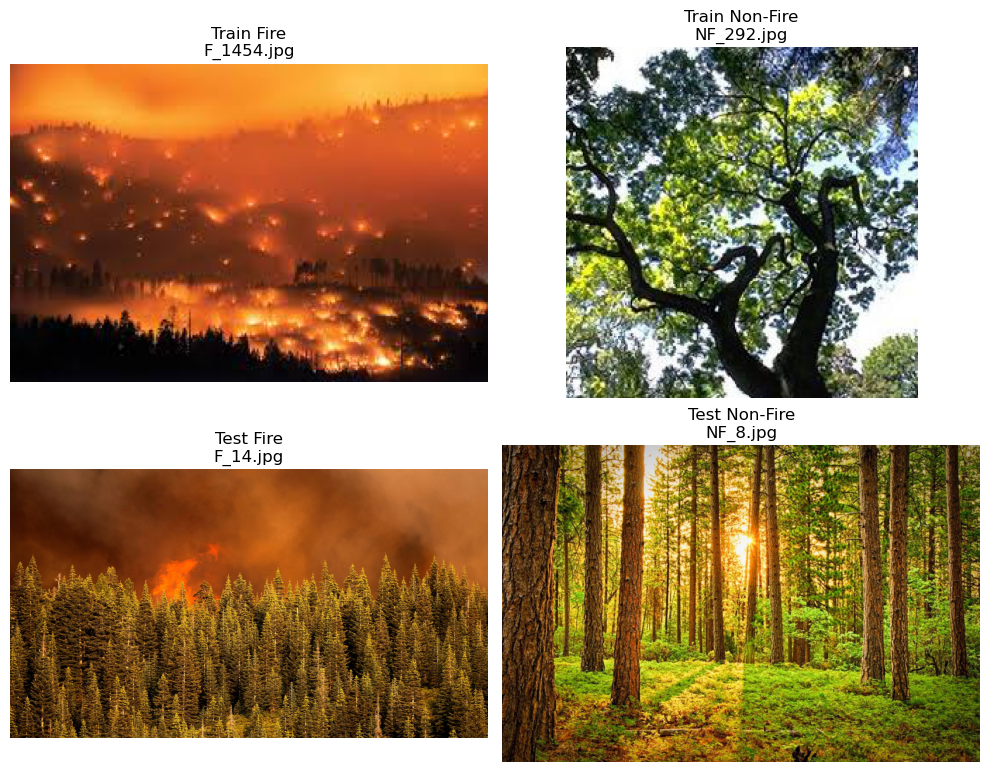

In [3]:
## Pseudocode:
##  Define 4 folders:
## 
##  Define a function to pick one random image from a given folder:
##    a. Get all files in the folder
##    b. If no files found, return None
##    c. Otherwise, randomly choose one file
##    d. Read and return the image and its filename
## 
##  Create a list called "all_folders" with:
##    - A label (e.g., "Train Fire")
##    - The corresponding folder path
## 
##  Create a plot grid with size 10x8
## 
##  For each item in "all_folders":
##    Get a random image and its name using the function
##    If an image was found:
##       Add it to a 2×2 subplot (position depends on index)
##       Show the image
##       Add a title with the folder label and image name
##       Hide axis ticks for a cleaner look
##    If no image was found:
##       - Print a warning message for that folder
## 
##  Adjust layout to prevent overlap
## 
##  Show the full plot



train_fire = pl.Path("C:/DataSets/archive/Data/Train_Data/Fire")
train_non_fire = pl.Path("C:/DataSets/archive/Data/Train_Data/Non_Fire")
test_fire = pl.Path("C:/DataSets/archive/Data/Test_Data/Fire")
test_non_fire = pl.Path("C:/DataSets/archive/Data/Test_Data/Non_Fire")

# Step 2: Random image selection function
def pick_random_image(folder):
    images = list(folder.glob("*.*"))
    if not images:
        return None, None
    chosen = random.choice(images)
    img = mpimg.imread(chosen)
    return img, chosen.name

# Step 3: Image display grid
all_folders = [
    ("Train Fire", train_fire),
    ("Train Non-Fire", train_non_fire),
    ("Test Fire", test_fire),
    ("Test Non-Fire", test_non_fire),
]

plt.figure(figsize=(10, 8))
for i, (label, folder) in enumerate(all_folders, 1):
    img, name = pick_random_image(folder)
    if img is not None:
        plt.subplot(2, 2, i)
        plt.imshow(img)
        plt.title(f"{label}\n{name}")
        plt.axis('off')
    else:
        print(f"No image found in {folder}")

plt.tight_layout()
plt.show()

In this step, we randomly choose images with fire and without fire from both the training and testing datasets. Each time the function runs, it consistently shows a clear difference between fire and non-fire images

In [4]:
## Store lists of file paths for images in two categories: "Fire" and "Non_Fire" 
## This part is taken from https://www.kaggle.com/code/rasagnakavuluri/forest-fire-prediction-and-management-using-dl

train_data_images = {
    "Fire": list(train_fire.glob("*.jpg")),
    "Non_Fire": list(train_non_fire.glob("*.jpg"))
}

test_data_images = {
    "Fire": list(test_fire.glob("*.jpg")),
    "Non_Fire": list(test_non_fire.glob("*.jpg"))
}

## Assign labels to the classes (Fire: 0, Non_Fire: 1)
labels = {
    "Fire": 0,
    "Non_Fire": 1
}

To ensure a clear distinction between the classes in our dataset, this code creates dictionaries that link class names (Fire and Non_Fire) to lists of image file paths. 
The variables train_fire and train_non_fire refer to directories that contain training images for each class. Since the model cannot interpret class names directly, we assign numerical labels: Fire = 0 and Non_Fire = 1. This part of code is taken from kaggle competition - https://www.kaggle.com/code/rasagnakavuluri/forest-fire-prediction-and-management-using-dl

In [5]:
## Processes images, and returns them as arrays along with their corresponding labels. 
## Counts and handles corrupted images that cannot be loaded

## Pseudocode:
## initialise empty lists X and y
## initialise corrupted_images_count to 0

## for each label, image_paths in image_paths_dict:
## for each img_path in image_paths:
## try:
## open the image from img_path and convert to RGB
## resize the image to (img_size, img_size)
## convert the image to array and append to X
## append the corresponding label from labels_dict to y
##  except any error:
##   increment corrupted_images_count
##   print error message
##
## convert X and y to numpy arrays
## return X, y, corrupted_images_count



def load_images_and_labels(image_paths_dict, labels_dict, img_size):
    X, y = [], []
    corrupted_images_count = 0
    for label, image_paths in image_paths_dict.items():
        for img_path in image_paths:
            try:
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    img = img.resize((img_size, img_size))
                    X.append(img_to_array(img))
                    y.append(labels_dict[label])
            except (UnidentifiedImageError, IOError, SyntaxError) as e:
                corrupted_images_count += 1
                print(f"Error loading image {img_path}: {e}")
    return np.array(X), np.array(y), corrupted_images_count


In this step, we create definition to load images for each class. 
Overall, according to the previous step we'll have 4 paths with 2 labes. We also set up image size as CNN model requires all input images to have the same shape (height × width × channels) because the architecture expects a fixed input tensor  

In [6]:
img_size = 100
X_train, y_train, corrupted_train_count = load_images_and_labels(train_data_images, labels, img_size)
X_test, y_test, corrupted_test_count = load_images_and_labels(test_data_images, labels, img_size)


We load our images based on the provided labes. We also set up img_size=100 as it is a prerequiste for CNN that images must be in the same size.
No corrupted images.

What is CNN and Why We Use It

A Convolutional Neural Network (CNN) is a type of deep learning model that works especially well with data arranged in a grid, like images. It is designed to automatically learn different levels of features in the data, such as shapes or patterns, by passing information through several layers. These layers include convolutional layers, pooling layers, and fully connected layers, and the learning process is adjusted using a method called backpropagation.

It consists of key components:
1: We perform the core operation, using filters (kernels) to scan input data. Each filter computes dot products between its weights and a local region of the input. The mathematical formulation of a 2D convolution is:
$$
S(i,j)=\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}{X(i+m,j+n)*K(m,n)}
$$
,where X is the input, K is the input of filters m and n an S is the output with i,j.
2: Activation Functions, such as ReLU (Rectified Linear Unit), introduce non-linearity. ReLU is expressed as:
$$
f(x)=max(x,0)
$$
3: Then, we reduce the spatial dimensions of feature maps, making computation more efficient and providing a form of translation invariance. For example, a 2×2 max pooling operation keeps only the largest value in each region
4: Fully Connected Layers at the end of the network use the extracted features to classify or predict outputs.

Usage of CNN

LeNet-5 is one of the most well-known CNN architectures. It was developed by Yann LeCun in 1998 and is often used to recognize handwritten numbers, especially in the MNIST dataset (G.Aurelien, 2016).
Overall, CNN is widely used in image classification, medical imaging, facial recognition, autonomous vehicles etc.



In [7]:
DefaultConv2D = tf.keras.layers.Conv2D

We create alias for the Conv2D layer in TensorFlow

In [8]:
model = keras.models.Sequential([
    layers.Conv2D(32, kernel_size=3, activation="relu", input_shape=[100, 100, 3]), 
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)



C:\Users\danii\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model details:
We build layer with 32 filters 3x3. As we introduced image_size = 100, we also specify it in the model with 100x100 with 3 channels.
Relu is the most widely used activation function in deep learning because ReLU functions help create sparse activations and reduce the risk of the vanishing gradient problem.

<img src="table.png">



Then, we downsample feature maps. 
We convert 2D feature maps into a 1D vector as it is required for dense function. 
Next, fully connected layer with 128 neurons and ReLU is utilised for decision making.
On the other hand, at the end, sigmoid function outputs probability [0,1] e.g. 0.75 is likely fire.

Model compile:
This code prepares the model for training by using the Adam optimizer, binary cross-entropy as the loss function for two-class classification, and accuracy as the evaluation metric.

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353,217 (16.61 MB)

 Trainable params: 4,353,217 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

Model takes 100×100 images and passes them through two convolutional layers with ReLU activation and max pooling. Then it reduces the spatial size while increasing depth (from 32 to 64 filters). The output is flattened into a 33856-element vector, which is passed through a dense layer with 128 units. Finally it goes to a sigmoid-activated output neuron for binary classification. Most of the about 4.35 million trainable parameters come from the dense layer after flattening.


In [10]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

We rescale all pixel values to the 0–1 range (rescale=1./255) and applies random transformations like small rotations, horizontal flips, zooming, and shifting the image horizontally or vertically by up to 10%. This helps the model learn to distinguish patterns in varied conditions and prevents overfitting.

ImageDataGenerator expands the dataset size by applying random transformations to images on-the-fly. It is allowing the model to see new variations in each epoch which is especially helpful for preventing overfitting when data is limited. These augmentations - e.g. rotations, shifts, zooms, and flips not only increase variety but also improve the model's ability to generalise to real-world image variations. Furthermore, it integrates simply and efficiently into Keras training workflows, making it a powerful tool for building robust image classification models with minimal code and setup. 
Source: Keras Blog- https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html 

It becomes more useful due to the fact that our images are corrupted and cannot be loaded. 

In [11]:
X_test = X_test / 255.0 ## to match rescalling on train data

In [12]:
model_run = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


C:\Users\danii\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8321 - loss: 0.3957 - val_accuracy: 0.8800 - val_loss: 0.3503
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9166 - loss: 0.2112 - val_accuracy: 0.9000 - val_loss: 0.3321
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9297 - loss: 0.1847 - val_accuracy: 0.9400 - val_loss: 0.2721
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9371 - loss: 0.1608 - val_accuracy: 0.9000 - val_loss: 0.3987
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9339 - loss: 0.1785 - val_accuracy: 0.9200 - val_loss: 0.2802
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9516 - loss: 0.1421 - val_accuracy: 0.9600 - val_loss: 0.2277
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9512 - loss: 0.1310 - val_accuracy: 0.9000 - val_loss: 0.4726
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9553 - loss: 0.1273 - val_accuracy: 0.940

During 10 epochs, the model’s training accuracy increased from 83.2% to 95.8%, while the training loss decreased steadily. Validation accuracy peaked at 96% in epoch 6, showing strong generalization. Although validation loss varied slightly in later epochs, overall performance remained stable and effective.

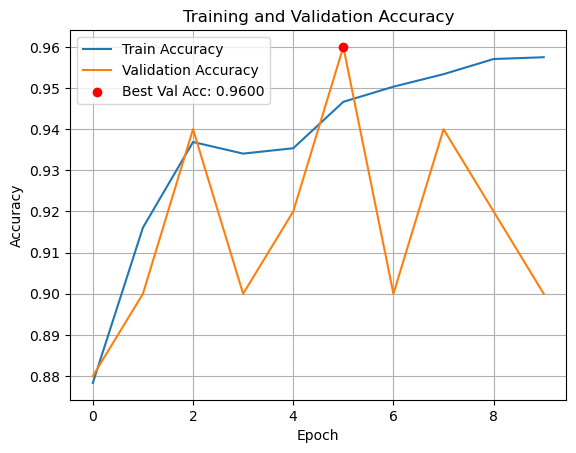

In [13]:
## Pseudocode:
## Get training and validation accuracy from model history
## Find the highest validation accuracy and its corresponding epoch
## Plot training and validation accuracy over epochs
## Highlight the best validation accuracy point on the graph
## Show the plot with labels and grid

train_acc = model_run.history['accuracy']
val_acc = model_run.history['val_accuracy']

# Find best validation accuracy and its epoch
best_val_acc = max(val_acc)
best_val_epoch = val_acc.index(best_val_acc)

# Plotting
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.scatter(best_val_epoch, best_val_acc, color='red', label=f'Best Val Acc: {best_val_acc:.4f}', zorder=5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Here we plot each epchos and its accuracy. As it is expected, train accuracy is a little bit higher, however we obtained very good results in epchos 6 having 0.96 accuracy.

In [14]:
model_droput_added = keras.models.Sequential([
    layers.Conv2D(32, kernel_size=3, activation="relu", input_shape=[100, 100, 3]), 
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5), ## adding dropout feautre
    layers.Dense(1, activation="sigmoid")
])

model_droput_added.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

C:\Users\danii\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We implement the dropout technique to reduce overfitting. According to dropout randomly disables a percentage of neurons during training, which helps the model learn more general and independent features. In our case, we use a dropout rate of 0.5, which is considered aggressive. Dropping neurons with 50% probability introduces the highest variance in the network’s behavior, potentially improving learning and generalization. Similarly, Baldi and Sadowski (2004) found that a 50% dropout rate provides the strongest regularization effect.

In [15]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

# Fit the model
history = model_droput_added.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8074 - loss: 0.4448 - val_accuracy: 0.9000 - val_loss: 0.3546
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9026 - loss: 0.2464 - val_accuracy: 0.8800 - val_loss: 0.4726
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9144 - loss: 0.2132 - val_accuracy: 0.8200 - val_loss: 0.4196
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9182 - loss: 0.2179 - val_accuracy: 0.9200 - val_loss: 0.4319
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9359 - loss: 0.1765 - val_accuracy: 0.9200 - val_loss: 0.4178
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9345 - loss: 0.1872 - val_accuracy: 0.9000 - val_loss: 0.3668
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9361 - loss: 0.1737 - val_accuracy: 0.9400 - val_loss: 0.3167
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9482 - loss: 0.1434 - val_accu

Across 10 epochs, training accuracy improved from 80.7% to 94.7%, with a steady reduction in loss. Validation accuracy peaked at 94% in epoch 7. Altough, validation loss showed some fluctuation. Overall, the model demonstrated strong learning progress with good generalization performance.
As we can see, dropout did not add additional % in accuracy while validation loss is noticably bigger compared to no dropout added feature. It can be explained by the fact that dropout feature randomly disables neurons during training. This helps the model learn more general features, but it also means the training process is less confident and our model does not see the full structure all at once during training.

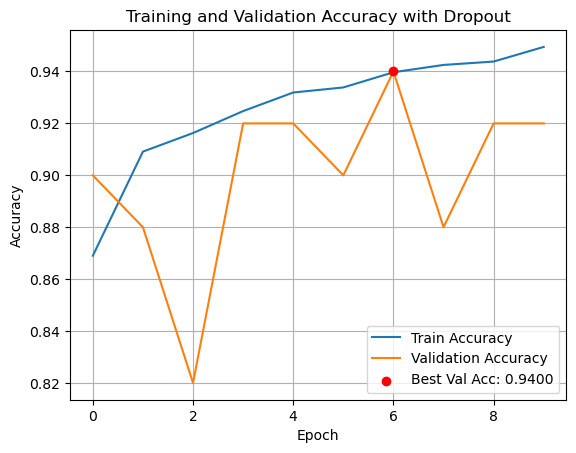

In [16]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Find best validation accuracy and its corresponding epoch
best_val_acc = max(val_acc)
best_val_epoch = val_acc.index(best_val_acc)

# Plotting training and validation accuracy
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.scatter(best_val_epoch, best_val_acc, color='red', label=f'Best Val Acc: {best_val_acc:.4f}', zorder=5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Dropout')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
base_model = MobileNetV2(input_shape=(100, 100, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\danii\AppData\Local\Temp\ipykernel_21356\4136581645.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(100, 100, 3), include_top=False, weights='imagenet')


What is MobileNetV2?

MobileNet is keras pretrained model with 1000 classes specifically desgined for small devices and embedded systems. 
We are going to implement it as it might be very useful addition as this model can be used in fire systems. 

In [18]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

In [19]:
history_ready_model = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9018 - loss: 0.2688 - val_accuracy: 0.8600 - val_loss: 0.2517
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9609 - loss: 0.1172 - val_accuracy: 0.9000 - val_loss: 0.2711
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9639 - loss: 0.1084 - val_accuracy: 0.9000 - val_loss: 0.2834
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9690 - loss: 0.1029 - val_accuracy: 0.8600 - val_loss: 0.3016
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9658 - loss: 0.0990 - val_accuracy: 0.8400 - val_loss: 0.2994
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9668 - loss: 0.0955 - val_accuracy: 0.9200 - val_loss: 0.2686
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9722 - loss: 0.0840 - val_accuracy: 0.8800 - val_loss: 0.2965
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9712 - loss: 0.0816 - val_accu

Over 10 epochs, the model’s training accuracy improved from 90.2% to 97.1%, with a steady decrease in training loss. Validation accuracy remained stable, reaching its peak at 92% in epoch 6. Although validation loss showed some fluctuation, it stayed generally low. These results suggest effective learning and good generalization. Since MobileNetV2 is designed for resource-efficient deployment on mobile and embedded devices, it appears to be a suitable candidate for real-world use in lightweight applications.

Why did simple CNN outperfom MobileNetV2?

The possible reason could be that mobilenetv2 is supposed to work with large volumes of data. Another reason could be that we did not properly tune our model while MobileNetV2 is generally a low parameter application. Nonetheless, we also observe that MobileNetV2 is the most stable compared to two different models.

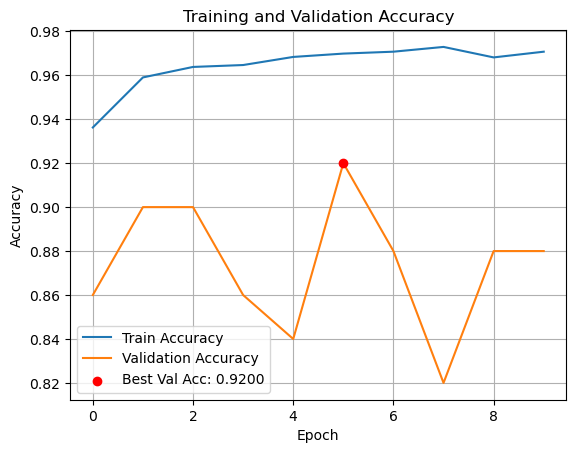

In [20]:
train_acc = history_ready_model.history['accuracy']
val_acc = history_ready_model.history['val_accuracy']

# Find best val accuracy
best_val_acc = max(val_acc)
best_val_epoch = val_acc.index(best_val_acc)

# Plot
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.scatter(best_val_epoch, best_val_acc, color='red', label=f'Best Val Acc: {best_val_acc:.4f}', zorder=5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Conclusion
Based on the evaluation results, three Convolutional Neural Network (CNN) architectures were compared: a standard CNN, a CNN with dropout regularization, and a transfer learning model using MobileNetV2. The standard CNN achieved a peak validation accuracy of 96% by epoch 6, demonstrating strong learning capability and effective generalization. When dropout was added to mitigate overfitting, the model maintained good performance with a peak validation accuracy of 94%, although validation loss increased and showed greater fluctuation—an expected outcome due to the stochastic nature of dropout during training.

The MobileNetV2-based model, built on a pretrained architecture designed for efficient performance on resource-constrained devices, achieved the highest training accuracy at 97.1% and consistent validation accuracy around 92%. While it did not surpass the best validation accuracy of the basic CNN, it offered more stable performance across epochs and demonstrated resilience to overfitting. Furthermore, the use of transfer learning with MobileNetV2 allows for faster convergence and better feature extraction, especially with limited training data.

In summary, while the standard CNN reached the highest single validation accuracy point, the MobileNetV2 model presents a more reliable and scalable solution. Its consistent performance, efficient architecture, and compatibility with mobile deployment make it the most suitable model among the three for practical applications such as real-time fire detection.